<a href="https://colab.research.google.com/github/shubhj17/Machine_Learning_Algos/blob/master/Linear_Regression_Algorithm_on_Auto_mpg_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Importing Libraries

import pandas as pd
import numpy as np
#import matplotlib.plot as mpt 
import random
import matplotlib.pyplot as plt

In [0]:
# Loading Dataset

dataset = pd.read_csv("auto-mpg.csv")

In [6]:
# Checking Correlation between columns

dataset.corr()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
mpg,1.000000,-0.775396,-0.804203,-0.831741,0.420289,0.579267,0.563450
cylinders,-0.775396,1.000000,0.950721,0.896017,-0.505419,-0.348746,-0.562543
displacement,-0.804203,0.950721,1.000000,0.932824,-0.543684,-0.370164,-0.609409
weight,-0.831741,0.896017,0.932824,1.000000,-0.417457,-0.306564,-0.581024
acceleration,0.420289,-0.505419,-0.543684,-0.417457,1.000000,0.288137,0.205873
model year,0.579267,-0.348746,-0.370164,-0.306564,0.288137,1.000000,0.180662
origin,0.563450,-0.562543,-0.609409,-0.581024,0.205873,0.180662,1.000000


In [0]:
# Selecting feature and column based on correlation

displacement = dataset['displacement']
target = dataset['mpg']

In [0]:
displacement = displacement/displacement.max()
target = target/target.max()

In [0]:
# Defining Functions 

def line(m,displacement,c):
    return m*displacement + c

def partial_der_slope(m,displacement,c,target):
    return 2*np.mean((line(m,displacement,c) - target)*displacement)

def partial_der_intercept(m,displacement,c,target):
    return 2*np.mean(line(m,displacement,c) - target)

def minimise_error(m,displacement,c,target):
    return np.mean(line(m,displacement,c) - target)**2
def accuracy(error,target):
    return 100 - ((error/np.mean(target**2))*100)

0.3779550057581223
0.3077453200983301
Accuracy of Algorithm is 99.53678966003484 %


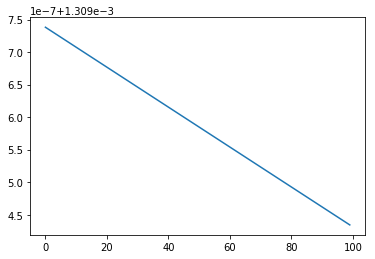

In [46]:
# Training our Dataset

m = random.random()
#m = 0.0001
#c = 1
c = random.random()
cost=[]
alpha = 0.000001
for i in range(0,100):
    m = m-alpha*partial_der_slope(m,displacement,c,target)
    c = c-alpha*partial_der_intercept(m,displacement,c,target)
    cost.append(minimise_error(m,displacement,c,target))
    #print(line(m,displacement,c),target)
    
print(m)
print(c)
print("Accuracy of Algorithm is",accuracy(minimise_error(m,displacement,c,target),target),"%")
plt.plot(cost)
plt.show()